In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_curve, auc

In [2]:
# Load the data
df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

# 1. Data Loading and Initial Inspection

In [9]:
# Show first rows of data set:
print(df.head())
# Show data type of each column:
print(df.info())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V22       V23       V24       V25       V26  \
0  0.098698  0.363787  ...  0.277838 -0.110474  0.066928  0.128539 -0.189115   
1  0.085102 -0.255425  ... -0.638672  0.101288 -0.339846  0.167170  0.125895   
2  0.247676 -1.514654  ...  0.771679  0.909412 -0.689281 -0.327642 -0.139097   
3  0.377436 -1.387024  ...  0.005274 -0.190321 -1.175575  0.647376 -0.221929   
4 -0.270533  0.817739  ...  0.798278 -0.137458  0.141267 -0.206010  0.502292   

        V27       V28  Amount  C

# 2. Data Overview

In [4]:
#Show amount of rows and columns:
print(df.shape)
# Show statistical summary of each data set column:
print(df.describe())
# Show amount of empty cells in data set per column:
print(df.isnull().sum())

(284807, 31)
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271

## Insights:

**Time**: Since the unit of measure is seconds, the data set covers roughly 48 hours (or 2 days) of credit card transactions.

**Class**: Value for mean (around 0.002) already shows to small fraction of class fraud (value: 1) compared to the amount of non-fraudulent transactions (value: 0)

**NULL**: There are no empty cells in the data set.

# 3. Class Distribution

Class distribution:
Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64


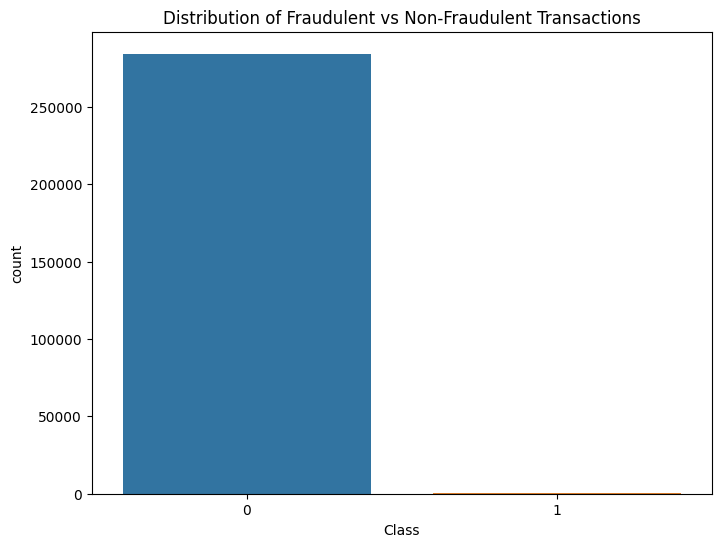

In [5]:
fraud_dist = df['Class'].value_counts(normalize=True)
print("Class distribution:")
print(fraud_dist)

plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df)
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')
plt.show()

# 4. Feature Analysis

<Figure size 1200x600 with 0 Axes>

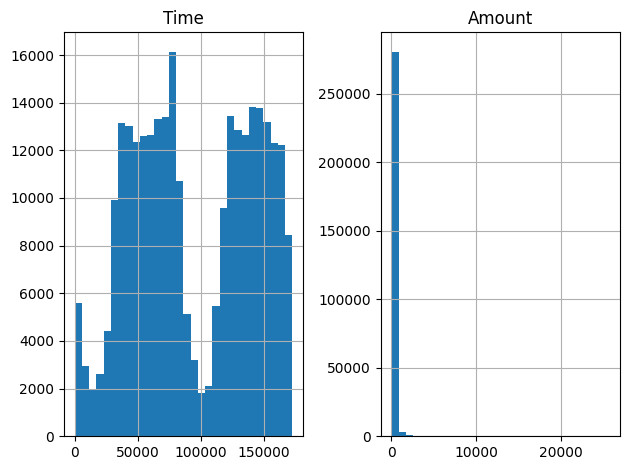

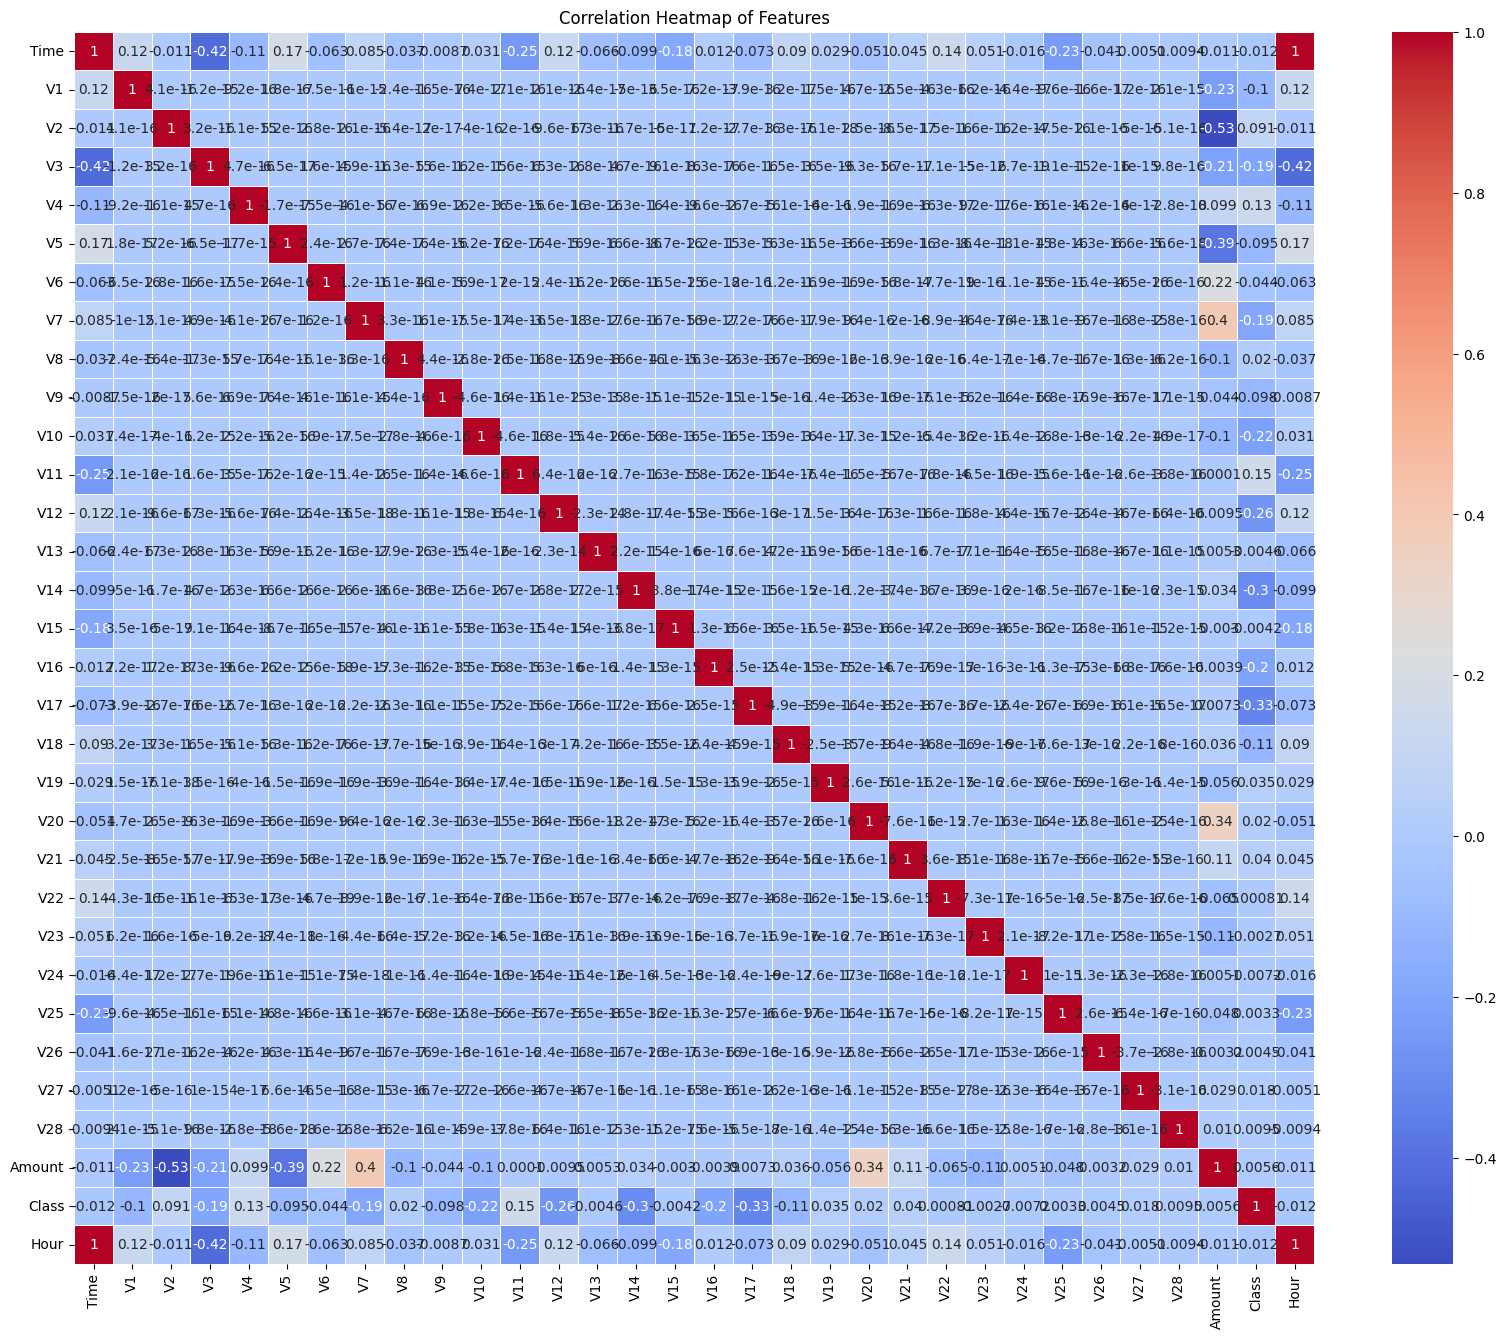

In [10]:
plt.figure(figsize=(12, 6))
df[['Time', 'Amount']].hist(bins=30)
plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

# 5. Time-based Analysis

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


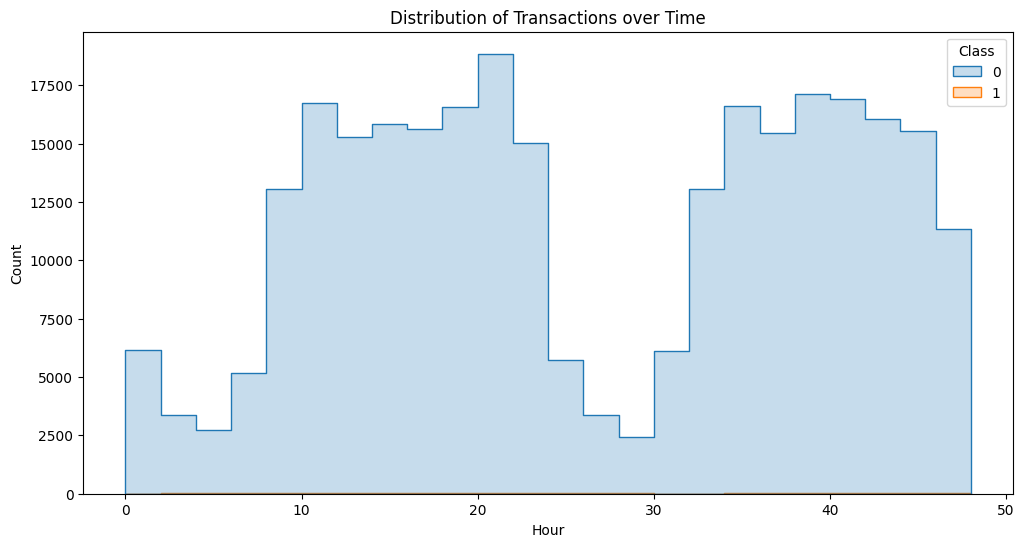

In [11]:
plt.figure(figsize=(12, 6))
df['Hour'] = df['Time'] / 3600  # Convert seconds to hours
sns.histplot(data=df, x='Hour', hue='Class', bins=24, element='step')
plt.title('Distribution of Transactions over Time')
plt.show()

# 6. Amount Analysis

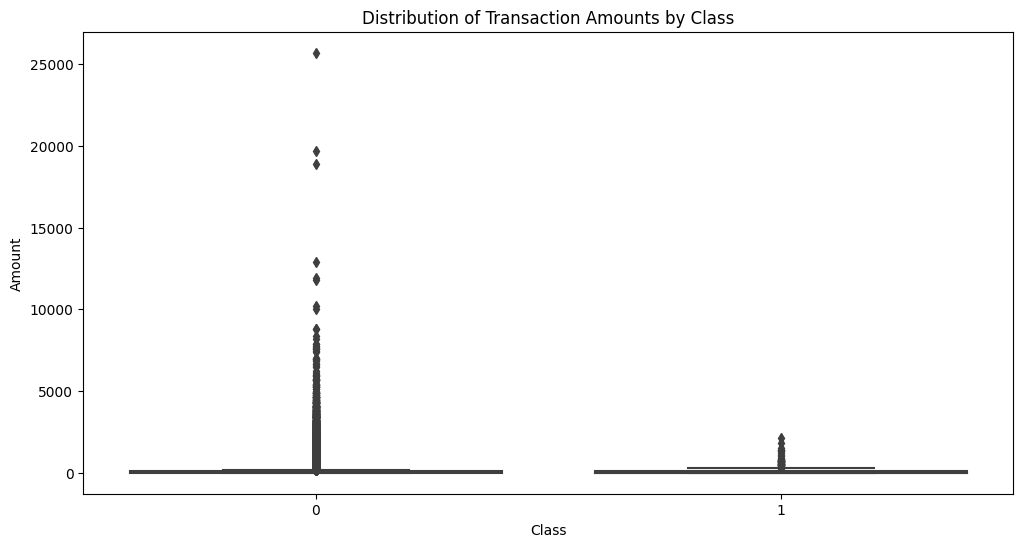

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Distribution of Transaction Amounts by Class')
plt.show()

## Insights

- Frauds are only in small transaction amounts (> 2500 or so)

# Bonus: AUPRC calculation

In [16]:
# Create predictions based on the rule: Amount < 2500 is considered fraud
y_true = df['Class']
y_pred = (df['Amount'] < 2500).astype(int)

# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_true, y_pred)

# Calculate area under the precision-recall curve
auprc = auc(recall, precision)

print(f"Area Under the Precision-Recall Curve: {auprc:.4f}")

Area Under the Precision-Recall Curve: 0.5009


## Insights

I guess the above with an AUPRC value of 0.5 would be a baseline model to beat, initially.